Q1


In [ ]:
import pandas as pd                  
import numpy as np                   
import matplotlib.pyplot as plt      
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import train_test_split   

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/CSE4020_ML/Lab-4

/content/gdrive/My Drive/CSE4020_ML/Lab-4


In [ ]:
df = pd.read_csv('email.csv')   

In [ ]:
df.head()   

,x0,x1,x2,x3,x4,x5,class
0,1,1,1,0,1,1,1
1,1,0,0,1,1,0,0
2,1,0,1,1,0,0,1
3,1,1,0,0,1,0,0
4,1,1,0,1,0,1,1


In [ ]:
df['class'].value_counts()    

1    3
0    3
Name: class, dtype: int64

In [ ]:
df.columns               

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'class'], dtype='object')

In [ ]:
X = df.drop(['class'], axis = 1)      #here, we would take all the columns except 'class' as input vector
y = df['class']                       #here, we are taking the output as the 'class' column in our dataset
ynewtest = y
xnewtest = X
y = y[:, np.newaxis]                   #converting the output to an array 
print('The shape of the input is {}'.format(X.shape))     #printing the shape of the input
print('The shape of the output is {}'.format(y.shape))    #printing the shape of the output

The shape of the input is (6, 6)
The shape of the output is (6, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


Below, we would be dividing the giving input and output values into 2 sets namely the training set and the test set. We use the training set to train the model and tune the hyperparameters so that it would be efficient in the test set. In the test set, we would be measuring the accuracy of the trained model.

In [ ]:
# initialize list of lists
data = [[1 , 0 , 1, 0, 1, 1 ], [1 , 1 , 1, 1, 0, 0  ], [0 , 0 , 0, 0, 0, 1 ]]
  
# Create the pandas DataFrame
X_test_data = pd.DataFrame(data, columns=['x0', 'x1','x2','x3','x4','x5'])
  
# print dataframe.
X_test_data

,x0,x1,x2,x3,x4,x5
0,1,0,1,0,1,1
1,1,1,1,1,0,0
2,0,0,0,0,0,1


In [ ]:
d1 = [[1],[1],[0]]
# Create the pandas DataFrame
y_test_data = pd.DataFrame(d1, columns=['spam or not spam'])
  
# print dataframe.
y_test_data
print('The shape of the input testing set is {}'.format(X_test_data.shape))
print('The shape of the output testing set is {}'.format(y_test_data.shape))

The shape of the input testing set is (3, 6)
The shape of the output testing set is (3, 1)


In [ ]:
#We are initially defining the sigmoid function that could be used later
def sigmoid(z):
    
    sigmoid = 1 / (1 + np.exp(-z))
    
    return sigmoid

In [ ]:
#This is a function that is used to initialize the weights with 0 and biases also with 0 and return them
def initialize_with_zeros(dim):
    weight = np.zeros((dim, 1))
    bias = 0
    return weight, bias

In [ ]:
#this network ensures that there is a forward propagation and at the same time, returns the cost
def propagate(w, X, y):
    
    m = X.shape[0]
    A = sigmoid(np.dot(X, w))
    cost = -(1 / m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A)) #computing the cost function or the error function
    dw = (1 / m) * np.dot(X.T, (A - y))   #this is derivative of the cost function with respect to w
    grads = {'dw': dw
             #,it is stored in this format 'db': db
             }          #these values are stored in a dictionary so as to access them later
    return grads, cost 


In [ ]:
#We are trying to get the parameters w and b after modifying them using the knowledge of the cost function
def optimize(weight, X, y, num_iterations, learning_rate, print_cost = False):
    costs = []                    #This is an empty list created so that it stores all the values later
    for i in range(num_iterations):
        grads, cost = propagate(weight, X, y)       #we are calling the previously defined function 
        dw = grads['dw']                          #we are accessing the derivatives of cost with respect to w
        weight = weight - learning_rate * dw                #we are modifying the parameter w so that the cost would reduce in the long run
        np.squeeze(cost)
        if i % 100 == 0:
            costs.append(cost)                    #we are giving all the cost values to the empty list that was created initially
        if print_cost and i % 1000 == 0:
            print("cost after iteration {}: {}".format(i, cost))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    params = {'weight': weight
             # , 'b': db
              }                    #we are storing this value in the dictionary so that it could be accessed later
    grads = {'dw': dw
             #, 'db': db
             }                  #we are storing these valeus in the dictionary so that they could be accessed later
    return params, grads, costs

In [ ]:
#This is a function that gives 1 if the activation is greater that 0.5 and 0 if it is lower than 0
def predict(weight, X):
    m = X.shape[0]
    y_prediction = np.zeros((m, 1))
    A = sigmoid(np.dot(X, weight))
    for i in range(A.shape[0]):
        if (A[i, 0] <= 0.5):
            y_prediction[i, 0] = 0
        else:
            y_prediction[i, 0] = 1
            
    return y_prediction

In [ ]:
def model(X_train, X_test, y_train, y_test_data, num_iterations, learning_rate, print_cost = True):
    weight, b = initialize_with_zeros(X.shape[1])
    parameters, grads, costs = optimize(weight, X, y, num_iterations, learning_rate, print_cost = True)
    weight = parameters["weight"]
    #b = parameters["b"]
    y_prediction_test = predict(weight, X_test)
    y_prediction_train = predict(weight, X_train)
    
    print('train accuracy: {}'.format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print('test accuracy: {}'.format("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test_data)) * 100)))
    
    d = {"costs": costs,
         "y_prediction_test": y_prediction_test, 
         "y_prediction_train" : y_prediction_train, 
         "weight" : weight, 
         #"b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    print("weights after learning")
    print(weight)
    return d

cost after iteration 0: 0.6931471805599452
cost after iteration 1000: 0.0061184007534884595
cost after iteration 2000: 0.0030352323027256333
cost after iteration 3000: 0.002017122489978118
cost after iteration 4000: 0.0015102161982267436
cost after iteration 5000: 0.0012068289962841746
cost after iteration 6000: 0.001004907422540986
cost after iteration 7000: 0.0008608509292005229
cost after iteration 8000: 0.0007529070993802162
cost after iteration 9000: 0.0006690111294709356


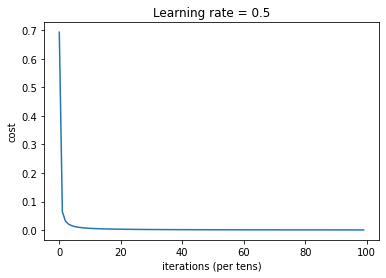

train accuracy: 100.0
test accuracy: test accuracy: spam or ham    66.666667
dtype: float64 %
weights after learning
[[-2.73054510e-15]
 [-1.95225961e-15]
 [ 7.41506269e+00]
 [ 1.05647370e-15]
 [-7.41506269e+00]
 [ 7.41506269e+00]]


In [ ]:
d = model(X , X_test_data, y , y_test_data, num_iterations = 10000, learning_rate = 0.5, print_cost = True)

In [ ]:
df

,x0,x1,x2,x3,x4,x5,class
0,1,1,1,0,1,1,1
1,1,0,0,1,1,0,0
2,1,0,1,1,0,0,1
3,1,1,0,0,1,0,0
4,1,1,0,1,0,1,1
5,1,1,0,1,1,0,0


In [ ]:
# xpred = xnewtest
# ypred = ynewtest
# i = 2       #play around with this number to access each row in the training and test set and check the accuracy
# xnewpred = X_test_data.iloc[i]
# ynewpred = y_test_data.iloc[i]
# print('The input values of the features are:')
# print(xnewpred)
# print('The actual output whether a email is spam or ham:')
# print(float(ynewpred))
# xnewpred = xnewpred[:, np.newaxis]
# xnewpred = xnewpred.T
# ynew = predict(d["weight"], xnewpred)
# print('The output of the predicted value is:')
# print(ynew[0][0])


### Q2



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X_test_data)
 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Evaluation and accuracy
from sklearn.metrics import accuracy_score #works
print('')
print('Accuracy of the model in via sklearn model is = ', accuracy_score(y_test_data, y_pred))


Accuracy of the model in via sklearn model is =  0.6666666666666666


#### Q3


In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn

In [ ]:
# dataset
disease_df = pd.read_csv("heart.csv")
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())


   Sex_male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0         1   39        4.0              0         0.0     0.0   
1         0   46        2.0              0         0.0     0.0   
2         1   48        1.0              1        20.0     0.0   
3         0   61        3.0              1        30.0     0.0   
4         0   46        3.0              1        23.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    195.0  106.0   70.0  26.97   
1                0             0         0    250.0  121.0   81.0  28.73   
2                0             0         0    245.0  127.5   80.0  25.34   
3                0             1         0    225.0  150.0   95.0  28.58   
4                0             0         0    285.0  130.0   84.0  23.10   

   heartRate  glucose  TenYearCHD  
0       80.0     77.0           0  
1       95.0     76.0           0  
2       75.0     70.0           0  
3 

In [ ]:
disease_df.drop(['education'], inplace = True, axis = 1)

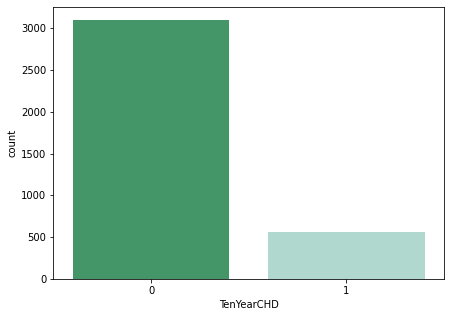

In [ ]:
# counting no. of patients affected with CHD
plt.figure(figsize = (7, 5))
sn.countplot(x ='TenYearCHD', data = disease_df,
             palette ="BuGn_r" )
plt.show()

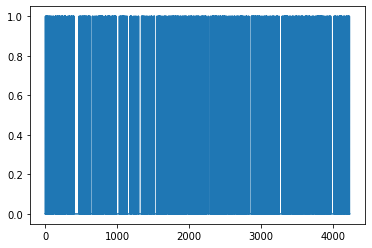

In [ ]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

In [ ]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay',
						'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
		X, y, test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)



Train set: (2924, 6) (2924,)
Test set: (732, 6) (732,)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluation and accuracy
from sklearn.metrics import accuracy_score #works
print('')
print('Accuracy of the model in finding heart disease is = ',accuracy_score(y_test, y_pred))



Accuracy of the model in finding heart disease is =  0.837431693989071


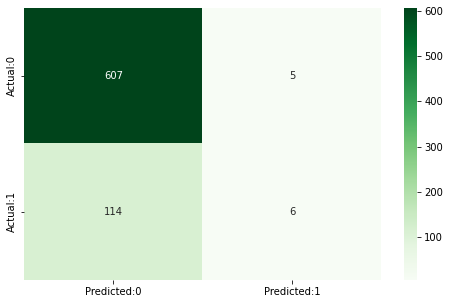

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       612
           1       0.55      0.05      0.09       120

    accuracy                           0.84       732
   macro avg       0.69      0.52      0.50       732
weighted avg       0.79      0.84      0.78       732



In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
 
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
 
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))